# Lecture 1: Direction fields.

## Ordinary differential equations.

An **ordinary differential equation (ODE)** is an equation relating the derivatives of some unknown function $y$ of a single variable $x$.  To solve the equation is to find the full family of functions satisfying the equation.  Typically, there are infinitely many solutions to a given ODE if there is a solution at all.

The **order** of the ODE is highest order of derivative that appears in the equation.
A typical first-order ODE can be expressed in the form
\begin{equation}\label{first order ode form}\tag{1.1}
y' = f(x,y).
\end{equation} 

A differential equation together with one or more initial values is called an **initial-value problem (IVP)**.
The general rule is that the number of initial values needed for an initial-value problem is equal to the order of the differential equation.
For example, the data
\begin{align}
y' &= y + \sin x\label{example 1.1.a}\tag{1.2}\\
y(0)&=-\frac{1}{2}.\label{example 1.1.b}\tag{1.3}
\end{align}
define a first-order IVP.
This course will primarily focus on the development of (approximate) numerical solutions to first-order IVP's.

## Direction fields for first-order ODE's.

A **direction field** (or **slope field**) is a graphical visualization for an ordinary differential equation (ODE) consisting of short line segments which are tangent to the unique solution to the ODE that passes through the midpoint of the line segment.
Given an ODE of the form \eqref{first order ode form} a direction field can be generated by evaluating $f$ on a **mesh** of points in the $xy$-plane and sketching a line segment with slope $f(x,y)$ at the mesh point $(x,y)$.

## Creating direction fields with Python.

Below we generate a direction field with window $[-3, 3]\times [-2 2]$ for the ODE \eqref{example 1.1.a}.
We use two popular Python packages for this task.
The [NumPy](https://numpy.org/doc/stable/index.html) package provides efficient routines and data structures for scientific computing.
[MatPlotLib](https://matplotlib.org/stable/) is a visualization library.

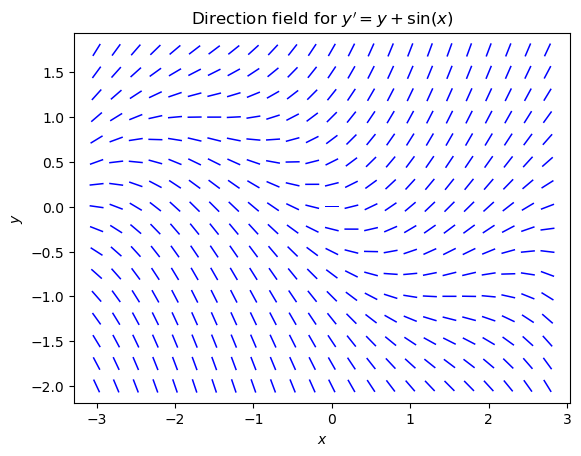

In [40]:
# import numpy and matplotlib.pyplot with conventional shorthands
import numpy as np 
from matplotlib import pyplot as plt

# define ODE RHS
f = lambda x, y: y + np.sin(x)
# set window boundaries
xmin, xmax = -3, 3;
ymin, ymax = -2, 2;

# set step sizes defining the horizontal/vertical distances between mesh points
hx, hy = 0.25, 0.25;

# sample x- and y-intervals at appropriate step sizes; explicitly creating array of doubles
xvals = np.arange(xmin, xmax, hx, dtype=np.double);
yvals = np.arange(ymin, ymax, hy, dtype=np.double);

# create rectangle mesh in xy-plane; data for each variable is stored in a separate rectangle array
X, Y = np.meshgrid(xvals, yvals);
dx = np.ones(X.shape); # create a dx=1 at each point of the 2D mesh
dy = f(X,Y);    # sample dy =(dy/dx)*dx, where dx=1 at each point of the 2D mesh
# normalize each vector <dx, dy> so that it has "unit" length
[dx, dy] = [dx, dy]/np.sqrt(dx**2 + dy**2);

# plot "vector field" without arrowheads
dfield = plt.figure();
# NOTE: pivot='mid' anchors the middle of the arrow to the mesh point
# the _nolegend_ flag prevents a legend object from being generated in the later merged graphic
dplot = plt.quiver(X, Y, dx, dy, color="b", headlength=0, headwidth=1, pivot="mid", label='_nolegend_'); 
plt.title(r"Direction field for $y' = y+\sin(x)$");
plt.xlabel("$x$");
plt.ylabel("$y$");

## Computing symbolic solutions with SymPy.

[SymPy](https://docs.sympy.org/latest/index.html) is a Python library for symbolic mathematics.
If the ODE in question can be solved analytically, we can try using the SymPy module to compute solutions.
The code snippet below demonstrates how to compute the general solution to \eqref{example 1.1.a}.

In [41]:
import sympy
from IPython.display import display, Markdown

# redefine RHS of ODE using sympy's symbolic version of sin(x)
f = lambda x, y: y + sympy.sin(x)

# define symbolic function y and symbolic variable x
x = sympy.Symbol('x');
y = sympy.Function('y');

# create an Eq object representing the ODE
ode = sympy.Eq(y(x).diff(x), f(x,y(x)));

# solve the ODE for y(x) using sympy's dsolve
soln=sympy.dsolve(ode, y(x)); soln

display(Markdown(f"The general solution to the ODE $y'(x)={sympy.latex(ode.rhs)}$ is ${sympy.latex(soln)}$."))

The general solution to the ODE $y'(x)=y{\left(x \right)} + \sin{\left(x \right)}$ is $y{\left(x \right)} = C_{1} e^{x} - \frac{\sin{\left(x \right)}}{2} - \frac{\cos{\left(x \right)}}{2}$.

To solve an IVP with SymPy, we simply pass the initial conditions of the problem stored as a Python dictionary.  The code snippet below computes the particular solution to the IVP \eqref{example 1.1.a}-\eqref{example 1.1.b}.

In [42]:
x0, y0 = 0, -1/2;
psoln=sympy.dsolve(ode, ics={y(x0): y0}); psoln
display(Markdown(f"The general solution to the IVP \
    $y'(x)={sympy.latex(ode.rhs)}$, $y({x0})={y0}$ is ${sympy.latex(psoln)}$."))

The general solution to the IVP     $y'(x)=y{\left(x \right)} + \sin{\left(x \right)}$, $y(0)=-0.5$ is $y{\left(x \right)} = - \frac{\sin{\left(x \right)}}{2} - \frac{\cos{\left(x \right)}}{2}$.

We can plot the particular solution above on top of the direction field that we created by first converting the result to a lambda function that can be evaluated numerically.

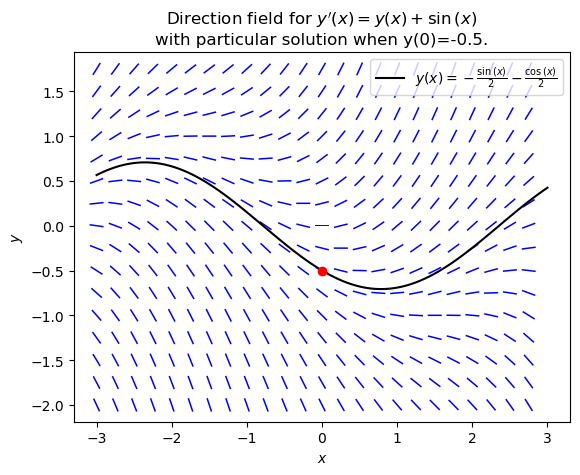

In [43]:
yfunc=sympy.lambdify(x, psoln.rhs, modules=['numpy']); 
xvals = np.linspace(xmin, xmax, num=100);
plt.figure(dfield) # set the current figure to direction field created above
plt.plot(xvals, yfunc(xvals), color='k');
plt.title(f"Direction field for $y'(x)={sympy.latex(ode.rhs)}$" 
             "\n" f"with particular solution when y({x0})={y0}.");
plt.plot(0,-1/2,'ro') # plot initial condition point (0,-1/2) in red
plt.legend([f"${sympy.latex(psoln)}$"], loc='upper right');
plt.show()

## Exercises:

1. Consider the first-order ODE 
\begin{equation*}
y' = 1/y.
\end{equation*}
    1. Compute the general solution to the ODE exactly.
    1. Create a direction field for the DE over the window $[-3, 3]\times [-3,3]$.
    1. Compute exact solutions to the IVP consisting of the ODE together with the initial condition $y(0)=1$ and then with $y(-2)=-1$.
    1. On a single set of axes, plot the solutions to each of the IVPs together with its initial condition point on top of your direction field.
       Be sure to choose different colors so that the different objects are distinguishable, and (as always) include appropriate labels and legends.

1. Consider the first order ODE 
\begin{equation*}
y' = -\frac{x}{y}.
\end{equation*}
    1. Create a direction field for the DE over the window $[-2, 2]\times [-2,2]$.
       What shape does the direction field suggest the solutions will take?
    1. Compute an exact solution to the IVP consisting of the ODE together with the initial condition $y(1)=1$.
    1. Plot the solution together with the initial condition point $(1,1)$ and your direction field from above on a single set of axes.